# Introduction
---

Hello guys, this is the first exercise and project I created. Ah, you can call me Arif. I will explain a little what I did here. I pretended as a *Data Analyst* in the **Coffee Shop** business and I was asked to <u>analyze</u> (I mean, a simple analyze) the sales data of previous several months back. The analyst results will be used by the Head Store <u>to see the progress</u> of the business and <u>make decisions</u> to increase sales of the store. At least, this condition I make is like that. Source of dataset and dashboard Tableau I put it down in file [url.txt](url.txt).


Your recommendation will be very useful for me, so I am waiting for that. Enjoy!

# Objectives
---

In a nutshell, I will analyze and make a visualize about dataset. This is some steps I will did:
1. Loading the data
2. Data cleaning
3. Data visualization
4. Analyze with descriptive (central tendency, skewness, kurtosis, etc) and inferential statistics (correlation test, etc) 
5. Conclusion

# A. Identification of Problems
---

## 1. Problem Statement with SMART Method

I try to formulate the problem I want to solve using the SMART method.

1. *Specific* : Increase product sales by creating product bundle promo plans based on products that are frequently ordered
2. *Measurable* : Increased 15% product sales from the previous quarter period
3. *Achievable* : Create a product bundle plan with a cheaper price than buying a single product separately
4. *Relevant* : The impact of this planning is to increase interest for new consumers and loyal consumers with more affordable prices
5. *Time-Bound* : The deadline for achieving the target of increasing 15% in product sales is 3 months

**Problem Statement** : Create a product bundle promo plan to increase 15% of product sales within 3 months to attract consumer interest in buying products.

## 2. Problem Description

Based on the problem statement I created before, these are a few questions I will solve:

1. What types of products are mostly ordered by consumers?
2. How many average orders we can receive each month?
3. In what month was the highest and lowest total income recorded?
4. Which store has the biggest revenue?
5. For beverage product types, what glass sizes are most ordered?
6. How is the distribution of income data for 2 back quarters?
7. Why is some product more ordered? Is it because more cheaper product prices?
8. Any correlation between the location of the store and total product sales?

# B. Import Library
---

This section just to write a library that will be use.

In [ ]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# C. Data Loading
---

## 1. Load Dataset

We load the dataset.

In [3]:
# load dataset
df = pd.read_csv('coffe_shop.csv')

# show up
df

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.00,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.00,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.00,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.00,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.00,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,129465,14-06-2023,08:34:10,5,Lower Manhattan,41,4,4.25,17.0,Coffee,Barista Espresso,Cappuccino,Large,June,Wednesday,8,6,2
149112,133523,17-06-2023,09:55:47,8,Hell's Kitchen,8,8,45.00,360.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,June,Saturday,9,6,5
149113,133674,17-06-2023,10:41:11,8,Hell's Kitchen,8,8,45.00,360.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,June,Saturday,10,6,5
149114,133744,17-06-2023,11:18:31,8,Hell's Kitchen,8,8,45.00,360.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,June,Saturday,11,6,5


In this dataset, the volume is 149116 rows and 18 columns with some features in numeric and categorical types.

## 2. Documentation of Dataset

The data provided contains several things related to transactions, which I explain below.

* `transaction_id` : specific id code for each transaction
* `transaction_date` : date of transaction
* `transaction_time` : time of transaction
* `store_id` : id code for each store
* `store_location` : location of branch store
* `product_id` : id code for each item/product
* `total_bill` : total payment in one transaction
* `unit_price` : price of each product
* `transaction_qty` : sum of transaction
* `product_category` : product category ordered
* `product_type` : types of products in each category
* `product_detail` : product name
* `Size` : the size intended for beverage products
* `Month Name` : month name 
* `Day Name` : day name
* `Hour` : hour of transaction
* `Month` : month of transaction (number)
* `Day of Week` : day numbering starts from Monday = 0 to Sunday = 6 (this numbering can be different in some other cases)

# D. Data Cleaning
---

In this section, I will make adjustments to the dataset to make it easier to analyze.

## 1. Change the Name of Columns

Make a name columns with format lowercase and used underscore to name columns with more than 2 words.

In [4]:
# change name columns with rename()

df = df.rename(columns={'Total_Bill': 'total_bill', 'Size': 'size', 'Month Name': 'month_name'})

## 2. Delete Columns

Delete columns that are not very important.

In [5]:
# delete columns with drop()
 
df = df.drop(columns=['Day Name', 'Hour', 'Month', 'Day of Week'])

## 3. Change Data Type

Adjusment the data type according the value in every columns.

In [6]:
# check dataset first

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   store_id          149116 non-null  int64  
 4   store_location    149116 non-null  object 
 5   product_id        149116 non-null  int64  
 6   transaction_qty   149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   total_bill        149116 non-null  float64
 9   product_category  149116 non-null  object 
 10  product_type      149116 non-null  object 
 11  product_detail    149116 non-null  object 
 12  size              149116 non-null  object 
 13  month_name        149116 non-null  object 
dtypes: float64(2), int64(4), object(8)
memory usage: 15.9+ MB


I decided to put it together between column `transaction_date` and `transaction_time` into a new column as `transaction_datetime`.

In [7]:
# make a new column with name transaction_datetime

df['transaction_datetime'] = df['transaction_date'] + ' ' + df['transaction_time']

# change the data type of transaction_datetime column to datetime
# adjusment transformation of textual condition with format DD-MM-YY

df['transaction_datetime'] = pd.to_datetime(df['transaction_datetime'], format='%d-%m-%Y %H:%M:%S')


# delete column of transaction_date and transaction_time

df = df.drop(columns=['transaction_date', 'transaction_time'])

Change the data type of `unit_price` and `total_bill` to be integer.

In [8]:
# change the data type of unit_price and total_bill

df['unit_price'] = df['unit_price'].astype(int)
df['total_bill'] = df['total_bill'].astype(int)

## 4. Handling Missing Value (Duplicate, Null/None/NaN)

We check the value with duplicated in other rows or not and value is `null`/`None`.

In [9]:
# check with duplicated()

df.duplicated().sum()

0

We have no duplicated data. 

Then we check value is `null`/`None`.

In [10]:
# use isnull()

df.isnull().sum()

transaction_id          0
store_id                0
store_location          0
product_id              0
transaction_qty         0
unit_price              0
total_bill              0
product_category        0
product_type            0
product_detail          0
size                    0
month_name              0
transaction_datetime    0
dtype: int64

Same, we don't have any value is `null`/`None`.

# E. Analyze & Calculate
---

In this section we will focus to solve the question in **Problem Description**. The result maybe can a diagram (visualize) or some kind of calculation.

## 1. What types of products are mostly ordered by consumers?

In [11]:
# search the type of product category first

df['product_category'].unique()

array(['Tea', 'Coffee', 'Bakery', 'Drinking Chocolate', 'Flavours',
       'Loose Tea', 'Packaged Chocolate', 'Branded', 'Coffee beans'],
      dtype=object)

The products sold are not only food (`Bakery`) and drinks (`Tea`, `Coffee`, `Chocolate`), but there are also non-food products (`Branded`).

In [12]:
# check what is the Branded product

df['product_type'][(df['product_category'] == 'Branded')].unique()

array(['Clothing', 'Housewares'], dtype=object)

The `Branded` product are `Clothing` and `Housewares`.

Now, we check the sum of orders for each product in 2 quartal.

In [13]:
# I grouped the data based on product_category and added it based on transaction_qty

df.groupby(['product_category']).sum()['transaction_qty'].sort_values(ascending=False)

product_category
Coffee                89250
Tea                   69737
Bakery                23214
Drinking Chocolate    17457
Flavours              10511
Coffee beans           1828
Loose Tea              1210
Branded                 776
Packaged Chocolate      487
Name: transaction_qty, dtype: int64

It can be seen that 89,250 `Coffee` products have been ordered, followed by 69,737 for `Tea` and 23,214 for `Bakery`.

<AxesSubplot:title={'center':'The Top-Selling Product'}, xlabel='Product Category', ylabel='Order'>

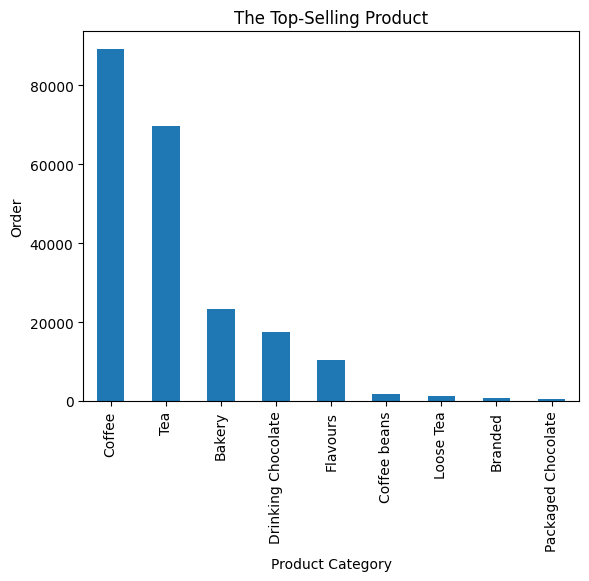

In [14]:
# make the plot

df.groupby(['product_category']).sum()['transaction_qty'].sort_values(ascending=False).plot(kind='bar', xlabel='Product Category', ylabel='Order', title='The Top-Selling Product')

Interpretation the results of the visualization above, we know that the product most ordered in the first 2 quarters was `Coffee`, then `Tea` then `Bakery`. This is the total of orders taken from all branches.

I choose data visualization with a bar chart because I wanted to see a comparison of the values ​​in every product category.

## 2. How many average orders we can receive each month?

In [15]:
# first, look the total ordered every month

df.groupby(['month_name']).sum()['transaction_qty']

month_name
April       36469
February    23550
January     24870
June        50942
March       30406
May         48233
Name: transaction_qty, dtype: int64

From the visualization above, we can see that <u>June is the highest orders</u> received, while in <u>February the lowest of orders</u> were received. 

C:\Users\ARIF\AppData\Local\Temp\ipykernel_13640\1116086404.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month_name', y='transaction_qty', data=group_month, order=month, palette='Set3').set(title='Order Product of Month')


[Text(0.5, 1.0, 'Order Product of Month')]

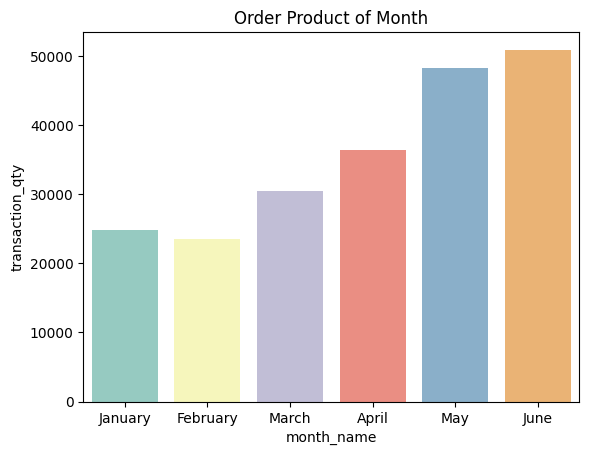

In [16]:
# make a list with the value of month name
month = ['January', 'February', 'March', 'April', 'May', 'June']

# make a new dataframe with the result of syntax total ordered every month
group_month = pd.DataFrame(df.groupby(['month_name']).sum()['transaction_qty'])

# make a plot
sns.barplot(x='month_name', y='transaction_qty', data=group_month, order=month, palette='Set3').set(title='Order Product of Month')

That visualization, it easier for us to understand that the <u>trend of orders tends to **increase** every month</u>. Then what about the average orders each month?

In [17]:
# group the data by month with the aggregate total of orders, then store it in a variable

order = df.groupby(['month_name']).sum()['transaction_qty'].sort_values(ascending=False).sum()

In [18]:
# calculate the average orders per month (divide by 6 because 2 quarters)

mean_pemesanan = order/6
print(f'Rata-rata pesanan yang diterima dalam setiap bulannya adalah {mean_pemesanan}')

Rata-rata pesanan yang diterima dalam setiap bulannya adalah 35745.0


From the results, it is concluded that the <u>average product orders each month are around 35,745 orders</u>.

## 3. In what month was the highest and lowest total income recorded?

In [19]:
# group the data by month and then calculate the aggregate income value for each month

profit = df.groupby(['month_name']).sum()['total_bill']

# save it in a new dataframe

profit = pd.DataFrame(profit)
profit.reset_index(inplace=True)

In [20]:
# search the highest and lowest total income

max_profit = profit['total_bill'].max()
min_profit = profit['total_bill'].min()

In [21]:
# show the highest total income in month name

profit[(profit['total_bill'] == max_profit)]

,month_name,total_bill
3,June,156281


In [22]:
# show the lowest total income in month name

profit[(profit['total_bill'] == min_profit)]

,month_name,total_bill
1,February,71418


It was concluded that **the highest income occurred in June** with total income of $156281, while **the lowest income occurred in February** with total income of $71418.

C:\Users\ARIF\AppData\Local\Temp\ipykernel_13640\3886406550.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month_name', y='total_bill', data=profit, order=month, palette='Set1').set(title='Profit of Month')


[Text(0.5, 1.0, 'Profit of Month')]

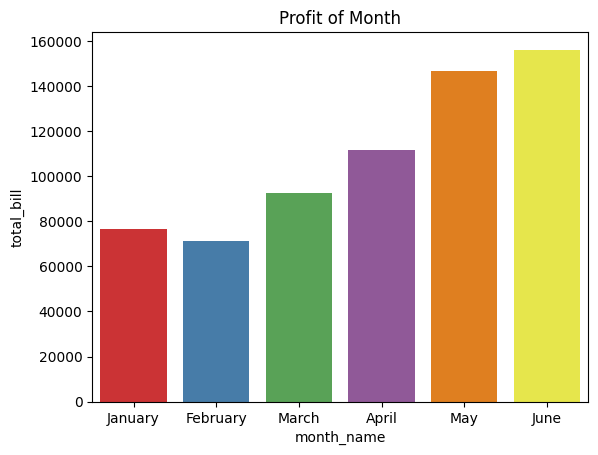

In [23]:
# make a plot

sns.barplot(x='month_name', y='total_bill', data=profit, order=month, palette='Set1').set(title='Profit of Month')

In conclusion, **the highest income occurs in June** and **the lowest income occurs in February**.

## 4. Which store has the biggest revenue?

In [24]:
# make a groupby with total income based on store_location 

df.groupby(['store_location']).sum()['total_bill']

store_location
Astoria            218060
Hell's Kitchen     222051
Lower Manhattan    215500
Name: total_bill, dtype: int32

It can be seen that the store that has the **largest revenue is in the `Hell's Kitchen`** branch.

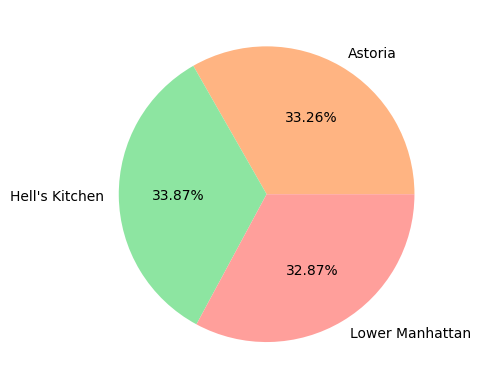

In [25]:
# I used seaborn to create pie chart
# create color
colors = sns.color_palette('pastel')[1:4]

# create label of branch
label = ['Astoria', "Hell's Kitchen", 'Lower Manhattan']

# create the pie chart
plt.pie(df.groupby(['store_location']).sum()['total_bill'], labels = label, colors = colors, autopct='%.2f%%')
plt.show()

In percentage terms, these three branches have revenues that are not much different. This means that the three *store* branches have relatively the same profitability. However, because we need to choose the branch that has the **largest revenue**, the **`Hell's Kitchen`** branch is the winner.

## 5. For beverage product types, what glass sizes are most ordered?

In [26]:
# check the type of size

df['size'].unique()

array(['Large', 'Regular', 'Not Defined', 'Small'], dtype=object)

`Not Defined` is a product whose size is not available, for example `Clothing` and `Housewares` products. So we will use data that contains the sizes `Large`, `Regular`, and `Small`.

In [27]:
# choose the size for glass

product_size = df[(df['size'] != 'Not Defined')]

In [28]:
# grouping the total transaction by the size

product_size.groupby(['size']).sum()['transaction_qty']

size
Large      68540
Regular    70186
Small      21423
Name: transaction_qty, dtype: int64

The results showed that **the most frequently ordered glass size is Regular**.

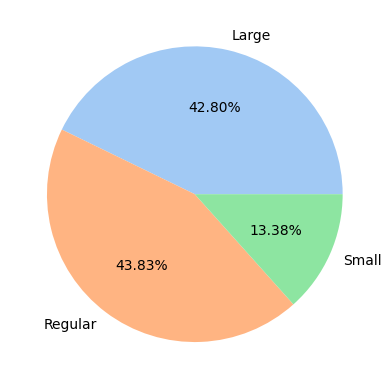

In [32]:
# define the color
colors = sns.color_palette('pastel')[0:5]

# create a list of size name
label = ['Large', "Regular", 'Small']

# create a pie chart with seaborn
plt.pie(product_size.groupby(['size']).sum()['transaction_qty'], labels = label, colors = colors, autopct='%.2f%%')
plt.show()

In the visualization above, it is known that several glass sizes ordered had a certain percentage during the first 2 quarters. However, we know that **`Regular` sized glasses are more frequently ordered** in all store branches for any beverage product that has glass sizes.

## 6. How is the distribution of income data for 2 back quarters?

In [108]:
# create a new dataframe with the content of total income sales

profit_distribution = df[['total_bill']]

#### Note

About the `total_bill` column, there is a transaction with a value of 0. This condition only happens if a consumer orders a beverage product with an additional 1 *topping/Flavours* (this is included in the product category). However, if consumers want more than 1 *Flavours* in their order, an additional fee will be calculated.

Therefore, the income data here that we will use must be paid transactions because there are certain conditions where a consumer does not pay for a product. So we will not use transaction data that has 0 bills/payments.

In [109]:
# choose the transaction with greater than $0

profit_distribution = profit_distribution[(profit_distribution['total_bill'] >= 1)]

In [110]:
# I decided to used a sample of data

sample_profit_distribution = profit_distribution.sample(n=1000)

In [111]:
# look for central tendency

mean = sample_profit_distribution['total_bill'].mean()
median = sample_profit_distribution['total_bill'].median()
modus = sample_profit_distribution['total_bill'].mode()[0]

print(f'Rata-rata pendapatan dari setiap transaksi sebesar ${mean}')
print(f'Nilai tengah dari pendapatan setiap transaksi adalah ${median}')
print(f'Besar pendapatan yang sering terjadi dalam setiap transaksi sebanyak ${modus}')

Rata-rata pendapatan dari setiap transaksi sebesar $4.229
Nilai tengah dari pendapatan setiap transaksi adalah $3.0
Besar pendapatan yang sering terjadi dalam setiap transaksi sebanyak $3


From the *central tendency* results, we can draw a **temporary conclusion** that the sample data **tends to be *skew* or not normally distributed** because the *mean* value is greater than the *median* and *mode*. We will test this assumption by looking at the *skewness* and *kurtosis* values.

In [121]:
# check for skewness and kurtosis

skewnes = sample_profit_distribution['total_bill'].skew()
kurt = sample_profit_distribution['total_bill'].kurtosis()

print(f'Nilai skewness dan kurtosis dari data pendapatan yaitu {skewnes} dan {kurt}')

Nilai skewness dan kurtosis dari data pendapatan yaitu 4.984679633131832 dan 59.6439489459524


After we test the *skewness* and kurtosis values, we know that this sample data **has a skew in its distribution** (the *skewness* value is above 1). Then if we also look at the kurtosis value, **the data distribution is leptokurtic** which has extreme values ​​(*outliers*).

To be even more sure, we try to do the *Shapiro-Wilk* test. If the *p-value* is greater than 0.05 then we can say the data is to be normally distributed.

In [113]:
# I used stats.shapiro to measure level of distribution

test_normality = stats.shapiro(sample_profit_distribution['total_bill'])
print(f'p-value: {test_normality.pvalue}')

p-value: 5.900831399511732e-39


It can be seen that the *Shapiro-Wilk* test value is very small so we can take the conclusion that **the population data distribution of total income is not normally distributed as judged by testing the sample data**.

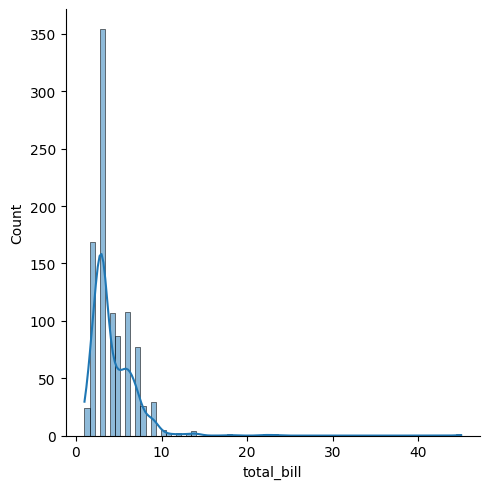

In [114]:
# create a plot to see the distribution

sns.displot(sample_profit_distribution['total_bill'], kde=True, label='Profit Distribution')

It can be seen that a lot of data is gathered on the left side (*skew*) which causes the sample data to not be normally distributed. This is very normal and not a problem.

## 7. Why is some product more ordered? Is it because more cheaper product prices?

Next, we want to see why one product is ordered more than other products. Is it because of the price? Or just a coincidence? Or is there really a relationship between cheap product prices and the number of sales (orders)?

The first thing we need to do is separate data where the payment is 0 (consumers can get 1 *flavors* for beverage products without paying/free, but still write transaction) because what we need is transaction data for consumers who buy products at a certain price. So, we only use data where at least `unit_price` is $1.

In [142]:
# create a new dataframe with the price of product greater than $0

transaction_cleaned = df[(df['unit_price'] >= 1)]

Before we start calculating the correlation, let's me set a few things first.
1. The type of data distribution we have is not normal, so the correlation testing we use must be flexible to our data type. For this reason, the *Spearman* method was chosen which tests the correlation of 2 numerical data.
2. In population data, the *p-value* from the correlation test will likely be small (close to 0 or even 0.0). Temporary guess, this is due to the large amount of data or perhaps a problem with computing capabilities. Whatever the reason, we will test 2 types of data, one test with population data and another one test with 1000 random sample data.
3. We determine the hypothesis to be tested
    - H0: There is no correlation between the price of a product and the number of purchases of that product
    - H1: There is a correlation between the price of a product and the number of purchases of that product
    - H0 will be accepted if *p-value* > 0.05, if not then we accept H1.

In [143]:
# used stats.spearmanr to test the correlation
# The correlation we test is the price of a product to its purchase

spearman, p_value = stats.spearmanr(transaction_cleaned['unit_price'], transaction_cleaned['transaction_qty'])
print(f"Nilai uji korelasi dengan spearman yaitu {spearman:.2f} dan p-value sebesar {p_value}")

Nilai uji korelasi dengan spearman yaitu -0.12 dan p-value sebesar 0.0


As expected, the *p-value* is 0.0 (so small that it is written as 0.0) with the meaning **H1 is accepted**. If we test with population data, then **there is sufficient evidence that price influences product purchases**. Then, a negative *spearman* value indicates **an inverse correlation** with these two variables. The higher the value of a variable, the lower the value of other variables. In a similar context, this means **the higher the price of a product, the lower the purchase quantity**. Vice versa.

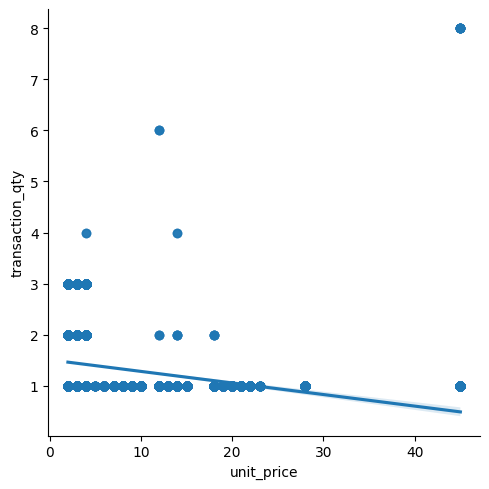

In [144]:
# we create a plot to see the visualization

sns.lmplot(data=transaction_cleaned, x='unit_price', y='transaction_qty')

Why do the data points look a little bit? This is because there is data that has the same number of orders but with different product prices so it seems slight (because they are coincide), even though the data is a lot.

Now we will try to test sample data taken randomly. Supposedly, the calculation results will not be much different from the results of the population data.

In [145]:
# take the sample

sample_transaction_cleaned = transaction_cleaned.sample(n=1000)

In [146]:
# do a test correlation

spearman, p_value = stats.spearmanr(sample_transaction_cleaned['unit_price'], sample_transaction_cleaned['transaction_qty'])
print(f"Nilai uji korelasi dengan spearman yaitu {spearman:.2f} dan p-value sebesar {p_value}")

Nilai uji korelasi dengan spearman yaitu -0.13 dan p-value sebesar 3.725867394222306e-05


It turns out that the results of calculating sample data and population data are not much different, in fact they are very close. Hypothesis H1 is accepted and there is an inverse correlation. For both samples and populations, we can conclude that **there is a correlation between price and quantity purchased**. The lower the price of a product, the greater the quantity purchased.

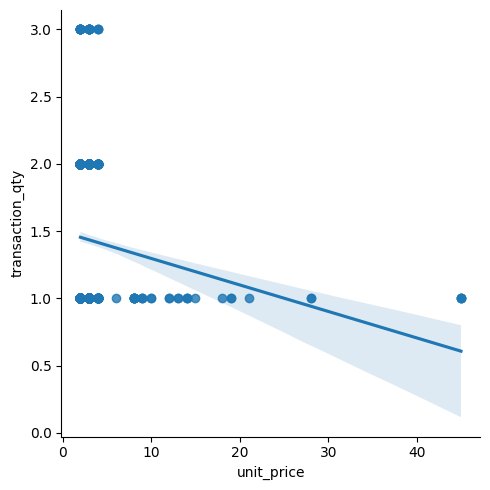

In [147]:
# that the visualization

sns.lmplot(data=sample_transaction_cleaned, x='unit_price', y='transaction_qty')

In the visualization, it can be seen that the direction of the relationship is reversed, which means that the lower the number of orders, the lower the number of purchases.

## 8. Any correlation between the location of the store and total product sales?

Lastly, sometimes a place influences the sales of a product. For this case, we will adjust it to *store* branches spread across 3 different places. Will the location of this branch affect the results of product sales or not?

Here we will use the *Kendall* method correlation test because the 2 variables we are testing are categorical (`store_location`) and numerical (`transaction_qty`). On the other hand, the *Kendall* method is also flexible for data that is not normally distributed like the data we use.

The hypothesis we use is as follows:
* H0: There is no correlation between the location of the *store* branch and the number of product purchases
* H1: There is a correlation between the location of the *store* branch and the number of product purchases

H0 is accepted if *p-value* > 0.05, otherwise H1 is accepted.

In [154]:
# do a test with stats.kendalltau()

corr_tau, pval_k = stats.kendalltau(df['store_location'], df['transaction_qty'])
print(f"Nilai tau-correlation: {corr_tau:.2f}, dan p-value: {pval_k}")

Nilai tau-correlation: 0.04, dan p-value: 1.3063058890578513e-70


c:\Users\ARIF\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Based on calculation, statistically it is clear that *p-value* < 0.05, which means we have sufficient evidence to reject H0 and accept hypothesis H1. Therefore, we have sufficient evidence that **there is a correlation between the location of the *store* branch and the number of product sales**. However, **if we review the correlation value**, it is clear that this is a **weak relationship** (because it is close to 0).
 

If I may conclude, then what actually happens is that the location of the branch and the number of sales actually don't have that much of an influence. The reason?
1. Obviously because the correlation value is low. The *p-value* only gives us answers via statistical evidence. How is it possible if two variables have a correlation but the strength is close to 0?
2. If we look at the product sales results on the dashboard in Tableau, when we filter *store location*, then in the *Best Selling Products* visualization, the percentage and type of products sold do not have significant differences between every stores. This shows that the third branch store actually does not have a significant difference in the total of their sales.
3. If the location of the *store* influences the total of sales, the income at a particular branch should be significantly different from other branches. However, what happens is, if we observe the visualization of *Monthly Profit Flow* on the Tableau dashboard, we do not find any significant differences in the amount of income for each *store*.

# E. Conclusion & Recommendation
---

At the end of this analysis, I will summarize several things to draw conclusions.
1. The most ordered products in the first 2 quarters of 2023 are *Coffee*, then *Tea*, then *Bakery*.
2. Every month, each store is able to receive 35,745 orders.
3. The highest income will occur in June 2023 and the lowest will be in February 2023.
4. The *Store* that has the highest income is the *Hell's Kitchen* branch.
5. The most frequently ordered glass type is the *Regular* size.
6. Income distribution during the first 2 quarters of 2023 is not normal but reasonable.
7. Products that are cheaper in terms of price are ordered more by consumers.
8. Statistically, the location of the branch has an influence on the number of product sales, but the conditions are very weak and perhaps it could be said that there are no conditions if we judge from the several reasons I have given.

From the conclusions I presented, I tried to make recommendations for *Head Store* regarding future programs.
- Seeing the habits of consumers who tend to buy cheaper products, the *product bundling plan* program has quite good possibilities. The choice that I recommend is choosing a combination product that has an affordable price with different product types. For example, we know that consumers tend to order more *Coffee*, *Tea* and *Bakery*. We can create *bundling products* between *Coffee* with *Bakery* or *Tea* with *Bakery*. It's just a matter of how we determine the price limit to adjust the margin we want so that we can still make a profit.
- If *Head Store* can make recommendations, maybe you can consider opening a new branch in the New York area (Astoria, Lower Manhattan, and Hell's Kitchen are in New York). Why? If we rely on the revenue results in the first 2 quarters, the third branch *store* has good revenue every month. Both the trend in revenue and the number of orders generally tend to increase from month to month. Plus, in big cities like NY, people's habit of drinking coffee rarely stops even though the seasons change. This could be quite a tempting opportunity to expand your business.
- Of all the glass sizes, the *Regular* size is the most ordered. This might be an indication that the average consumer is only able to pay for normal/*Regular* size drinks or their capacity to enjoy drinks is only limited to *Regular* size. However, that doesn't mean I'm saying that they can't afford the *Large* size or don't have the money so they buy the *Small* size, this is just a temporary guess that needs further investigation. Therefore, perhaps in our *product bundling plan* we can emphasize that for the type of beverage product, we will *bundle* using the *Regular* glass size which incidentally is more frequently ordered by consumers.

All of this, just pure my conclusion and recommendation based on the analysist. If you can tell me what I need to improve, I'am very glad to hear it.
Thank you very much.